In [26]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1 Multiclass classification

## 1.1. Dataset

In [162]:
matdata = sio.loadmat("ex3data1.mat", struct_as_record = False)

global y
global X
global y_one
global lambda_

X = matdata['X'] 
y = matdata['y']

print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (5000, 400)
y shape: (5000, 1)


## 1.2 Visualizing the data

ValueError: total size of new array must be unchanged

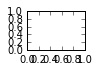

In [142]:
%matplotlib inline
fig = plt.figure()
y_labels = np.zeros((25))
for i in range(1,26):
    idx = i*np.random.randint(1,150) # Random image index
    
    # Show image
    ax = fig.add_subplot(5,5,i)
    ax.matshow(X[idx,:].reshape(20,20), interpolation='nearest', cmap=plt.cm.gray)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    y_labels[i-1] = (y[idx][0]) # Add label

print("Labels:")
print(y_labels.reshape(5,5))

## 1.3 Vectorizing logistic regression

### 1.3.1 Vectorizing cost function

In [277]:
def sigmoid(z):
    """Logistic regression func, returns probability"""
    return 1/(1+np.exp(-z))

def decorated_costFunction(theta_arg):
    global X, y_one, lambda_
    return costFunction(theta_arg,X,y_one, lambda_)

def costFunction(_theta, _X, _y, _lambda):
    J = 0
    m = y.size
    grad = np.zeros((_theta.size,1))
    h = sigmoid(_X.dot(_theta))
    h.shape = (h.size,1)
    
    J = (-1.0/m) * sum( _y.T.dot(np.log(h)) + (1-_y.T).dot(np.log(1-h)) )
    
    # Regularize the cost function - except theta[0]
    J += (_lambda/(2.0*m)) * sum(np.power(_theta[1:],2))
    
    # Fminunc expects single value
    return J

## 1.4 One vs All classification

In [164]:
# Add ones to X
X = np.hstack((np.ones([X.shape[0],1]), X))

In [292]:
# Minimize using scipy fmin
import scipy.optimize as opt


def oneVsAll(num_labels, lambda_arg):
    """"trains LR classifier and return classifier params in matrix"""
    global X, y_one,lambda_
    
    m = X.shape[0]
    n = X.shape[1]
    
    # This has to be returned
    all_theta = np.zeros((num_labels, n))
    
    #print("m, n, X",all_theta.shape, X.shape)
    
    # global var y_one
    
    lambda_ = lambda_arg
    
    # Train classifier for each label
    for i in range(1,num_labels+1):
        y_one = (y == i)
    
        #decorated_lrCostFunction(theta)
        all_theta[i,:] = opt.fmin(decorated_costFunction, all_theta[i,:].flatten(), maxiter=400)
        
    return all_theta

In [293]:
oneVsAll(10,0)

KeyboardInterrupt: 